<a href="https://colab.research.google.com/github/HyPeVxStarz/AI-driven-phishing-detection-system/blob/main/Assignment_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#imports

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#machine learning imports

nltk.download('stopwords')
#NTLK data

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
print("Downloading dataset...")
#Load data (Using UCI SMS Spam collection)

df = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', encoding='latin-1')
#Raw version of dataset

df = df[['v1', 'v2']]
df.columns = ['label', 'message']
#column optimisation

df['label_num'] = df.label.map({'ham': 0, 'spam': 1})
#Mapping labels to numbers

print("Data Loaded Successfully!")
print(f"Total messages: {len(df)}")
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data Loaded Successfully!
Total messages: 5572


,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [29]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
#Set up stemmer and stopwords

def preprocess_text(text):
    #Lowercase
    text = text.lower()
    #Remove special characters/punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    #Tokenize
    words = text.split()
    # 4. Remove stopwords and Stemming
    cleaned_words = [stemmer.stem(w) for w in words if w not in stop_words]
    return " ".join(cleaned_words)

print("Preprocessing messages... (This may take a moment)")
df['clean_message'] = df['message'].apply(preprocess_text)
#Apply to dataform

print("Preprocessing complete.")
df[['message', 'clean_message']].head()

Preprocessing messages... (This may take a moment)
Preprocessing complete.


,message,clean_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_message'],
    df['label_num'],
    test_size=0.2,
    random_state=42
)
    #Split data

tfidf = TfidfVectorizer(max_features=3000) # Keep top 3000 most frequent words
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()
#Convert text to numerical vectors

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
#Train model with Naive Bayes

print("Model trained successfully!")

Model trained successfully!


Accuracy: 0.9748878923766816

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



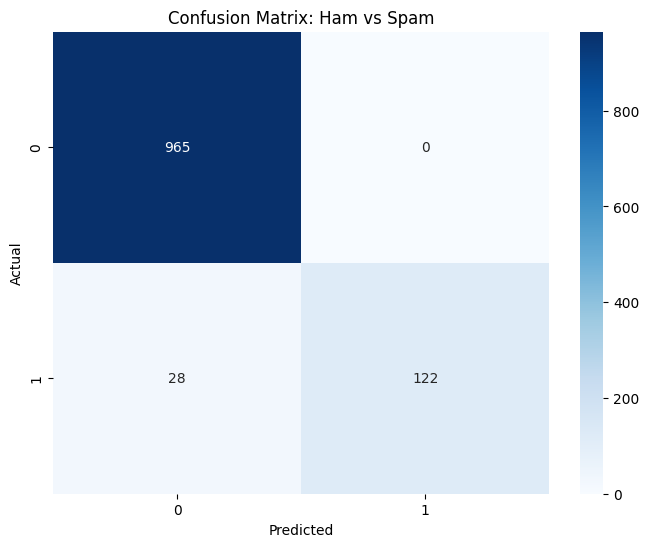

In [31]:
y_pred = model.predict(X_test_tfidf)
#Predictions

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
#Metrics

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Ham vs Spam')
plt.show()
#Confusion matrix visualisation



In [32]:
from sklearn.metrics import classification_report, confusion_matrix

#Get predictions from the Naive Bayes model
y_pred_nb = model.predict(X_test_tfidf)

print("=== BASELINE: NAIVE BAYES REPORT ===")
print(classification_report(y_test, y_pred_nb, target_names=['Ham', 'Spam']))

#Confusion Matrix for Baseline
print("\nBaseline Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

=== BASELINE: NAIVE BAYES REPORT ===
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99       965
        Spam       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115


Baseline Confusion Matrix:
[[965   0]
 [ 28 122]]


In [33]:
try:
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.utils import pad_sequences
except ImportError:
    from keras.src.utils.sequence_utils import pad_sequences
    from keras.src.legacy.preprocessing.text import Tokenizer

print("Imports successful!")

print("Imports successful!")

print("Imports successful!")

MAX_WORDS = 5000
MAX_LEN = 100
#Parameters

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
#Convert words to numbers

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
#Convert text to sequences of numbers

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')
#Requires all sequences are same length

print(f"Original text: {X_train.iloc[0]}")
print(f"Sequence: {X_train_seq[0]}")
print(f"Padded Sequence: {X_train_pad[0]}")




Imports successful!
Imports successful!
Imports successful!
Original text: im boat still mom check yo im half nake
Sequence: [5, 1635, 36, 449, 169, 236, 5, 280, 1636]
Padded Sequence: [   5 1635   36  449  169  236    5  280 1636    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

#MANUAL BALANCED WEIGHTS
# This tells the model Spam is 4x more important, but don't ignore Ham.
custom_weights = {0: 1.0, 1: 4.0}

#IMPROVED ARCHITECTURE
model_lstm = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=64, input_length=MAX_LEN),
    Bidirectional(LSTM(32, return_sequences=False)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

#LOWER LEARNING RATE

optimizer = Adam(learning_rate=0.0005)

model_lstm.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#TRAIN
print("Starting Refined Training...")
history = model_lstm.fit(
    X_train_pad, y_train,
    epochs=12,
    batch_size=32,
    validation_data=(X_test_pad, y_test),
    class_weight=custom_weights,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Starting Refined Training...
Epoch 1/12
140/140 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.8461 - loss: 0.8405 - val_accuracy: 0.9309 - val_loss: 0.2105
Epoch 2/12
140/140 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.9550 - loss: 0.3001 - val_accuracy: 0.9821 - val_loss: 0.0771
Epoch 3/12
140/140 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9865 - loss: 0.1337 - val_accuracy: 0.9830 - val_loss: 0.0607
Epoch 4/12
140/140 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.9943 - loss: 0.0715 - val_accuracy: 0.9857 - val_loss: 0.0533
Epoch 5/12
140/140 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.9948 - loss: 0.0461 - val_accuracy: 0.9821 - val_loss: 0.0594
Epoch 6/12
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9927 - loss: 0.0472 - val_accuracy: 0.9839 - val_loss: 0.0546
Epoch 7/12
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9987 - loss: 0.0203 - val_accuracy: 0.9794 - val_loss: 0.0643
Epoch 8/12
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - ac

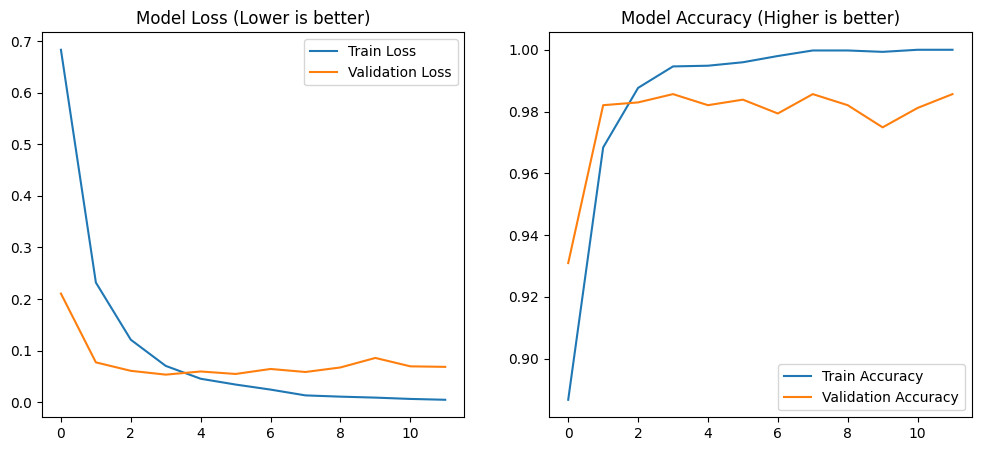

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9909 - loss: 0.0463
LSTM Model Accuracy: 98.57%
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step

LSTM Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       0.98      0.91      0.94       150

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [47]:
plt.figure(figsize=(12, 5))
#Graph for results

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Lower is better)')
plt.legend()
#Plot loss

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Higher is better)')
plt.legend()
plt.show()
#Plot accuracy

loss, accuracy = model_lstm.evaluate(X_test_pad, y_test)
print(f"LSTM Model Accuracy: {accuracy*100:.2f}%")
#Evaluation

y_pred_lstm = (model_lstm.predict(X_test_pad) > 0.5).astype("int32")
#Predictions for confusion matrix comparison

print("\nLSTM Classification Report:\n")
print(classification_report(y_test, y_pred_lstm))



In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping


# Define the LSTM model architecture
model_lstm = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_LEN),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_lstm.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early Stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_lstm.summary()
print("LSTM Model architecture defined and compiled successfully!")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

LSTM Model architecture defined and compiled successfully!


In [ ]:
print(y_train.value_counts())